<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Clase6_SistemasLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
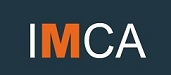


---


# CLASE: SISTEMAS LINEALES

# METODO DE JACOBI

Supongamos que tenemos un sistema de ecuaciones lineales de la forma $Ax=b$, donde $A$ es la matriz de coeficientes, $x$ es el vector de incógnitas y $b$ es el vector de términos constantes.

Inicializa un vector de solución inicial $x^{(0)}$ con valores iniciales (pueden ser arbitrarios).

Para cada componente $x_i^{(k)}$ en la k-ésima iteración, utiliza la siguiente fórmula para actualizarla:

$x_i^{(k+1)}=\dfrac{1}{A_{ii}}(b_i- \sum_{j≠i}^{n}​A_{ij}​x_j^{(k)})$

Donde $A_{ij}$ es el elemento de la matriz $A$ en la fila $i$, columna $j$, $b_i$​ es el i-ésimo elemento del vector $b$, y $x_j^{(k)}$​ es el j-ésimo componente del vector de solución en la k-ésima iteración.

In [ ]:
import numpy as np
#metodo Jacobi
A=np.array([[7,-6],[-8,9]],dtype='float')
b=np.array([3,-4],dtype='float')
x=np.array([0,0],dtype='float')
print(A)
print(b)
n=len(b)

x1=np.zeros_like(x)

for k in range(50):
  x1[:]=x
  for j in range(n):
    suma=0
    for i in range(n):
      if i==j:
        continue
      suma+=A[j,i]*x[i]
    x[j]=(b[j]- suma)/A[j,j]
  #print(x)

print(A@x)

In [ ]:
import numpy as np

#metodo Jacobi
A=np.array([[7,-6],[-8,9]],dtype='float')
b=np.array([3,-4],dtype='float')
x=np.array([0,0],dtype='float')
print(A)
print(b)

n=len(b)


for k in range(50):
  for j in range(n):
    suma=0
    for i in range(n):
      if i==j:
        continue
      suma+=A[j,i]*x[i]
    x[j]=(b[j]- suma)/A[j,j]
  #print(x)

print(A@x)

In [ ]:
#metodo de la potencia
import numpy as np
from numpy.linalg import eig
A=np.array([[-2,-3],[6,7]],dtype='float')
x=np.array([1,1],dtype='float')
def phi(x):
  return x[0]

for i in range(8):
  x0=x
  x=A@x
  r=phi(x)/phi(x0)
  print(x,r)
print("Usando eig\n", eig(A))


In [ ]:
#metodo de la potencia normalizada
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm

A=np.array([[6,5,-5],[2,6,-2],[2,5,-1]],dtype='float')
x=np.array([-1,1,1],dtype='float')

def phi(x):
  return x[1]

for i in range(20):
  x0=x
  x=A@x
  r=phi(x)/phi(x0)
  x /=norm(x)
  print(x,r)
print("Usando eig\n", eig(A))


In [ ]:
#metodo de la potencia simetrica
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm

A=np.array([[4,-1,1],[-1,3,-2],[1,-2,3]],dtype='float')
x=np.array([1,0,0],dtype='float')


for i in range(20):
  x0=x
  x=A@x

  r=(x0 @ x)/(x0 @ x0)
  x /=norm(x,np.inf)
  print(x,r)
print("Usando eig\n", eig(A))
